In [1]:
%matplotlib inline


# One-dimensional Prinz potential

Example for the :meth:`deeptime.data.prinz_potential` dataset.


Text(0.5, 0, 'time (a.u.)')

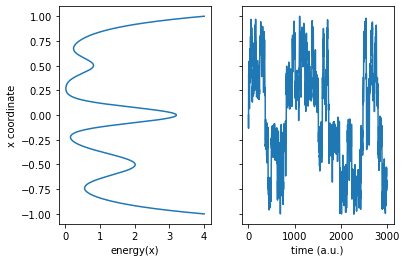

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from deeptime.data import prinz_potential

system = prinz_potential(n_steps=500, h=1e-5)
xs = np.linspace(-1, 1, 1000)
energy = system.potential(xs.reshape((-1, 1)))
traj = system.trajectory([[0.]], 3000)
dtraj = np.digitize(traj, bins=xs[:-1], right=False).squeeze()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(energy, xs)
ax1.set_ylabel('x coordinate')
ax1.set_xlabel('energy(x)')
ax2.plot(xs[dtraj])
ax2.set_xlabel('time (a.u.)')

Estimated transition matrix: [[0.05263158 0.13157895 0.34210526 ... 0.         0.         0.        ]
 [0.04166667 0.03333333 0.25       ... 0.         0.         0.        ]
 [0.03125    0.07211538 0.16826923 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.22754491 0.1257485  0.04291417]
 [0.         0.         0.         ... 0.27753304 0.15859031 0.09030837]
 [0.         0.         0.         ... 0.23888889 0.22777778 0.26666667]]
Estimated stationary distribution: [0.00063786 0.0020143  0.00698291 0.01446941 0.02440663 0.03081883
 0.03138955 0.02484306 0.01530868 0.01034014 0.00708366 0.00738578
 0.01285706 0.02061048 0.03282438 0.04603735 0.04656022 0.03340288
 0.01531925 0.00455265 0.0023312  0.00411932 0.01507198 0.03491943
 0.05164827 0.0549672  0.05410411 0.04859405 0.03863636 0.02877809
 0.02698569 0.03166586 0.04125856 0.04640344 0.0424535  0.03624646
 0.02681973 0.01662956 0.00753475 0.00298735]


Text(0.5, 0, 'j')

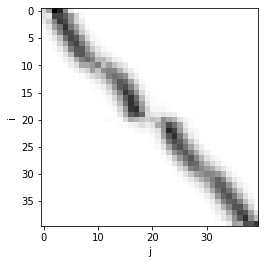

In [13]:
from deeptime.markov import TransitionCountEstimator
import deeptime.markov as markov

# Let's collect some long trajectory data, but binned coarsely
xs = np.linspace(-1, 1, 40)
traj = system.trajectory([[0.]], 30000)

# Digitize the results in a trajectory of discrete bin indices
dtraj = np.digitize(traj, bins=xs[:-1], right=False).squeeze()

# Create a count matrix
estimator = TransitionCountEstimator(lagtime=1, count_mode="sliding")
counts = estimator.fit(dtraj).fetch_model()  # fit and fetch the model

# Use the counts to estimate a reversible MSM matrix 

msm_estimator = markov.msm.MaximumLikelihoodMSM(reversible=True, stationary_distribution_constraint=None)
msm = msm_estimator.fit(counts).fetch_model()
T = msm.transition_matrix
print("Estimated transition matrix:", T)

pi = msm.stationary_distribution
print("Estimated stationary distribution:", pi)

plt.gray()
plt.imshow(1.0 - T)
plt.ylabel('i')
plt.xlabel('j')



evals [ 1.00000000e+00  9.94026990e-01  9.62181100e-01  9.22453978e-01
  6.57907498e-01  6.09062183e-01  5.05362278e-01  4.61883141e-01
  3.22908820e-01  2.94436060e-01  2.17841351e-01  1.74469944e-01
  1.44726225e-01  1.01581546e-01  8.51719269e-02  7.80354795e-02
 -5.41215459e-02  5.47740451e-02  4.54796105e-02  4.17486092e-02
 -3.65707079e-02 -3.68853323e-02 -2.96627748e-02 -3.04361541e-02
  2.53442191e-02  2.39231917e-02  2.35700654e-02  1.94714987e-02
  1.58753695e-02 -1.94795113e-02 -1.29614696e-02 -1.43924519e-02
 -8.99328862e-03  7.18653642e-03 -4.42836100e-03 -3.42841981e-03
 -1.18887635e-03  2.91739921e-04  2.15364303e-03  4.58162249e-03]
evecs [[ 0.00337526 -0.00565288 -0.00715985 ...  0.00489912 -0.029575
   0.00063708]
 [ 0.01065871 -0.01779336 -0.02214235 ...  0.0042334  -0.02990311
   0.00068032]
 [ 0.03695019 -0.06164043 -0.07641385 ... -0.00220011  0.00094824
  -0.00017649]
 ...
 [ 0.08799553  0.0836665  -0.03209664 ... -0.0363142  -0.0020243
   0.04048296]
 [ 0.039870

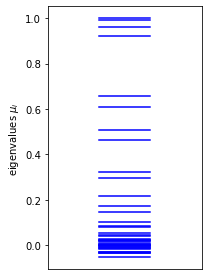

In [40]:
# Plot the eigenvalues

import numpy.linalg as linalg
evals, evecs = linalg.eig(np.transpose(T))

print('evals', evals)
print('evecs', evecs)

plt.figure(figsize=(3,4))
for i in range(len(evals)):
    plt.plot([1,2],[evals[i],evals[i]], 'b-')
plt.xlim(0,3)
plt.xticks([])
plt.ylabel('eigenvalues $\mu_i$')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'x')

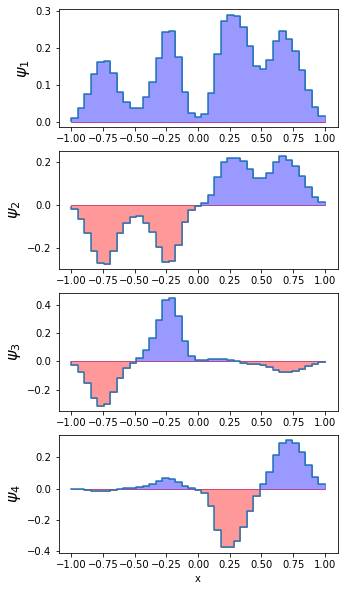

In [47]:
# Plot the top eigenvectors

nvalues = 4
plt.figure(figsize=(5,10))
for i in range(nvalues):
    plt.subplot(nvalues, 1, i+1)
    plt.step(xs, evecs[:,i])
    
    positive_comp = np.maximum(0,evecs[:,i])
    negative_comp = np.minimum(0,evecs[:,i])
    
    plt.fill_between(xs, positive_comp, step="pre", alpha=0.4, color='b')
    plt.fill_between(xs, negative_comp, step="pre", alpha=0.4, color='r')
    
    plt.ylabel(f'$\psi_{i+1}$', fontsize=16)
plt.xlabel('x')

In [39]:
evecs[:,0]

array([-0.15811388, -0.15811388, -0.15811388, -0.15811388, -0.15811388,
       -0.15811388, -0.15811388, -0.15811388, -0.15811388, -0.15811388,
       -0.15811388, -0.15811388, -0.15811388, -0.15811388, -0.15811388,
       -0.15811388, -0.15811388, -0.15811388, -0.15811388, -0.15811388,
       -0.15811388, -0.15811388, -0.15811388, -0.15811388, -0.15811388,
       -0.15811388, -0.15811388, -0.15811388, -0.15811388, -0.15811388,
       -0.15811388, -0.15811388, -0.15811388, -0.15811388, -0.15811388,
       -0.15811388, -0.15811388, -0.15811388, -0.15811388, -0.15811388])